### Theoretical Question

In [21]:
import statistics
from collections import Counter
import timeit
from matplotlib import pyplot as plt
from numpy.random import randint
import time

In [7]:
dict_={}
count=1
with open("/home/sophja/Documenti/ADM/ApplicantsInfo.txt","r", encoding='utf-8') as in_file:
    prima=in_file.readline() #line where is present number of students and number of exames taked by the students
    for line in in_file:
        line=line.replace('\n','').split(' ') 
        name=line[0]+' '+line[1] #take the name of each student
        integ=[int(i) for i in line[2:]] #turn the exames values as integer
        mean=statistics.mean(integ) #calculate the mean of the exames results
        if name in dict_.keys():
            name+=str(count)
            count+=1
        dict_[name]=round(mean,2) #create a dictionary with the name of the student as key and the mean of the exames as values
c=Counter(dict_.values()) #we count how many people has the same mean        

There were count people with the same names, I added a number after their surname to separate them

In [8]:
count

2420

Now we sort the keys on our Counter c. The keys of the Counter are the mean of the exames tooked just one time (if two people hase the same exame's mean we sort it just once)

In [15]:
to_sort=[i for i in c.keys()]
sorted_=mergeSort(to_sort)

We create the RankingList.txt after creating a sorted list of the exam's results; find the keys of the values od the dictionary dict_ we created and write down on the file the keys(name and surname) and the values (mean of the exames's result) 

In [16]:
with open ('RankingList.txt', 'a', encoding='utf-8') as out_file:
    for i in sorted_:
        keys = [k for k, v in dict_.items() if v == i]
        for el in keys:
            out_file.write('{} {}'.format(el, i))
            out_file.write('\n')


### MergeSort

In [102]:
def mergeSort(myList):
    start_time = timeit.default_timer() #start timer
    dt=[]
    if len(myList) > 1:
        mid = len(myList) // 2
        left = myList[:mid]
        right = myList[mid:]

        # Recursive call on each half
        mergeSort(left)
        mergeSort(right)

        # Two iterators for traversing the two halves
        i = 0
        j = 0
        
        # Iterator for the main list
        k = 0
        
        while i < len(left) and j < len(right):
            dt.append(timeit.default_timer()-start_time)
            if left[i] >= right[j]:
              # The value from the left half has been used
                myList[k] = left[i]
              # Move the iterator forward
                i += 1
            else:
                myList[k] = right[j]
                j += 1
            # Move to the next slot
            k += 1

        # For all the remaining values
        while i < len(left):
            dt.append(timeit.default_timer()-start_time)
            myList[k] = left[i]
            i += 1
            k += 1

        while j < len(right):
            dt.append(timeit.default_timer()-start_time)
            myList[k]=right[j]
            j += 1
            k += 1
    return myList

#### Time complexity

In Merge Sort, the given unsorted array with n elements, is divided into n subarrays, each having one element, because a single element is always sorted in itself. Then, it repeatedly merges these subarrays, to produce new sorted subarrays, and in the end, one complete sorted array is produced.

The concept of Divide and Conquer involves three steps:

1-Divide the problem into multiple small problems. 

2-Conquer the subproblems by solving them. The idea is to break down the problem into atomic subproblems, where they are actually solved.

3-Combine the solutions of the subproblems to find the solution of the actual problem.

Whenever we divide a number into half in every step, it can be represented using a logarithmic function, which is log n and the number of steps can be represented by log n + 1(at most)

Also, we perform a single step operation to find out the middle of any subarray, i.e. O(1).

And to merge the subarrays, made by dividing the original array of n elements, a running time of O(n) will be required.

Hence the total time for mergeSort function will become n(log n + 1), which gives us a time complexity of O(n*log n).


1000 Elements Sorted by MergeSort in  0.08099770545959473
2000 Elements Sorted by MergeSort in  0.2542450428009033
3000 Elements Sorted by MergeSort in  0.5711002349853516
4000 Elements Sorted by MergeSort in  1.049534797668457
5000 Elements Sorted by MergeSort in  1.6052882671356201
6000 Elements Sorted by MergeSort in  2.4087021350860596
7000 Elements Sorted by MergeSort in  3.345608949661255
8000 Elements Sorted by MergeSort in  7.306535720825195
9000 Elements Sorted by MergeSort in  5.3661863803863525


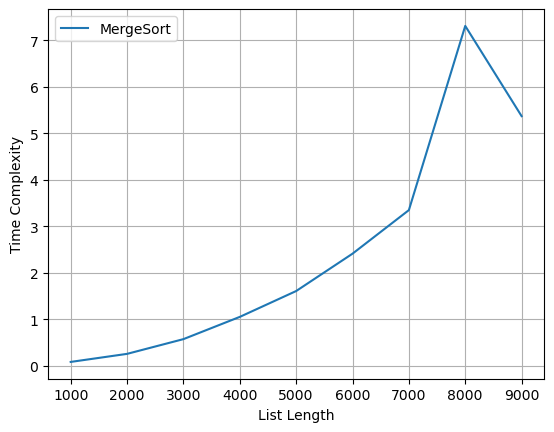

In [29]:
elements = list()
times = list()
for i in range(1, 10):
 
    # generate some integers
    a = randint(0, 1000 * i, 1000 * i)
    # print(i)
    start = time.time()
    insertionSort(a)
    end = time.time()
 
    # print("Sorted list is ", a)
    print(len(a), "Elements Sorted by MergeSort in ", end-start)
    elements.append(len(a))
    times.append(end-start)
 
plt.xlabel('List Length')
plt.ylabel('Time Complexity')
plt.plot(elements, times, label ='MergeSort')
plt.grid()
plt.legend()
plt.show()

### IsertionSort

In [27]:
def insertionSort(lista):

    for step in range(1, len(lista)):
        key = lista[step]
        j = step - 1
        
        # Compare key with each element on the left of it until an element smaller than it is found        
        while j >= 0 and key > lista[j]:
            lista[j + 1] = lista[j]
            j = j - 1
        
        # Place key at after the element just grater than it.
        lista[j + 1] = key
    return lista

#### Time complexity

Following are the steps involved in the Insertion sort:

We make the element of the given array at position array[step] as the key. The key here is the new element that we need to add to our existing sorted set of element.

We compare the key element with the elements before it.

If the key element is grater than the element right before, we continue checking the elements on the left of the array
Then, we make the next element of the array as key and will compare it with elements to it's left and insert it at the right position.

And we go on repeating this, until the array is sorted.

At worst, if we have an array sorted in reverse respect the sort we are looking for, i.e. our array is in ascending order and we want a descenting order, the time complixity will be O(n^2).

At best case, if we have an aray already sorted,we have to check all the elements of the array. The time complexity is O(n)

1000 Elements Sorted by insertionSort in  0.08377194404602051
2000 Elements Sorted by insertionSort in  0.2605001926422119
3000 Elements Sorted by insertionSort in  0.5767045021057129
4000 Elements Sorted by insertionSort in  1.0671031475067139
5000 Elements Sorted by insertionSort in  1.7143588066101074
6000 Elements Sorted by insertionSort in  2.395122766494751
7000 Elements Sorted by insertionSort in  3.3365495204925537
8000 Elements Sorted by insertionSort in  4.539979934692383
9000 Elements Sorted by insertionSort in  7.977052688598633


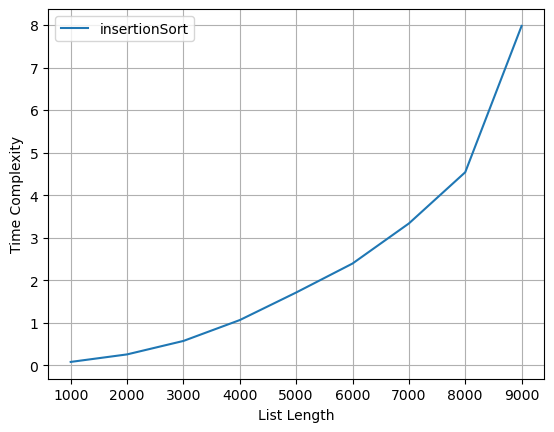

In [28]:
elements = list()
times = list()
for i in range(1, 10):
 
    # generate some integers
    a = randint(0, 1000 * i, 1000 * i)
    # print(i)
    start = time.time()
    insertionSort(a)
    end = time.time()
 
    # print("Sorted list is ", a)
    print(len(a), "Elements Sorted by insertionSort in ", end-start)
    elements.append(len(a))
    times.append(end-start)
 
plt.xlabel('List Length')
plt.ylabel('Time Complexity')
plt.plot(elements, times, label ='insertionSort')
plt.grid()
plt.legend()
plt.show()

### Selection Sort

In [4]:
def selectionSort(lista):
    start_time = timeit.default_timer() #start timer
# Traverse through all array elements
    for i in range(len(lista)):
     
    # Find the minimum element in remaining
    # unsorted array
        max_idx = i
        for j in range(i+1, len(lista)):
            if lista[max_idx] < lista[j]:
                max_idx = j
             
    # Swap the found minimum element with
    # the first element       
        lista[i], lista[max_idx] = lista[max_idx], lista[i]
 
    return lista

#### Time complexity

The Selection Sort uses two for cycle to sort the list. 

The first for is used to positioning the number in the right spot, the second for is used to search every time for the max number of the array right of the already sorted numbers.

We start at the first position (i=0) and we scroll the array to search for the maximun number with the second for, then we switch lista[i] with lista[max]. Then we increment the i and we search from i+1 (just the element we didn't sort) for the max.

So we scroll for all the n elements of the list, all the n elements O(n^2)

If the array is already sorted, we always do the same check, scrolling the array for every element O(n^2)

1000 Elements Sorted by selectionSort in  0.09569978713989258
2000 Elements Sorted by selectionSort in  0.30956554412841797
3000 Elements Sorted by selectionSort in  0.6441831588745117
4000 Elements Sorted by selectionSort in  1.136770486831665
5000 Elements Sorted by selectionSort in  1.7900755405426025
6000 Elements Sorted by selectionSort in  2.506206750869751
7000 Elements Sorted by selectionSort in  6.131228685379028
8000 Elements Sorted by selectionSort in  7.30403208732605
9000 Elements Sorted by selectionSort in  8.859710931777954


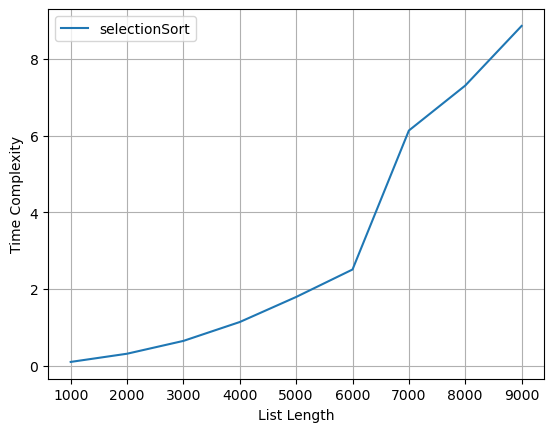

In [25]:
elements = list()
times = list()
for i in range(1, 10):
 
    # generate some integers
    a = randint(0, 1000 * i, 1000 * i)
    # print(i)
    start = time.time()
    selectionSort(a)
    end = time.time()
 
    # print("Sorted list is ", a)
    print(len(a), "Elements Sorted by selectionSort in ", end-start)
    elements.append(len(a))
    times.append(end-start)
 
plt.xlabel('List Length')
plt.ylabel('Time Complexity')
plt.plot(elements, times, label ='selectionSort')
plt.grid()
plt.legend()
plt.show()

##### What is the most optimal algorithm, in your opinion, and why?

The optimal algorithm between the ones I implemented is the merge sort. The divide-and-conquer algorithm breaks down a big problem into smaller, 
more manageable pieces that look similar to the initial problem. 
It then solves these subproblems and puts their solutions together to solve the original problem. 